## 3. Find similar wines!

<div style="text-align: justify">
We are asked to find a set of similar wines according to some characteristics by resorting to K-Means clustering and to implement the aforementioned by ourselves. 
<br>
First thing first, let us import our custom library (which contains every function built to realize from scratch the clustering procedure) and some visualization utilities.
</div>

In [1]:
import clustering_lib as cl
import matplotlib.pyplot as plt
from IPython.display import display, HTML

<div style="text-align: justify">
The second step will consist in creating the dataframe: we will not just import the data, the final structure will include three additional columns, namely: "Principal Component 1", "Principal Component 2" and "Principal Component 3". As the names suggest, those are the results of a PCA ran over our data. 
<br>
We decided to carry this out in order to better visualize the clouds of points discriminated by the "Type" attribute. 
<br>
Furthermore, since we are dealing with a clustering problem, we decided to scale all values so that they will become adimensional and improve comparability. We will print the first five rows to take a look.
</div>

In [2]:
processed_dataframe = cl.dataframe()

In [3]:
processed_dataframe.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Principal Component 1,Principal Component 2,Principal Component 3
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463,-0.165739
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393,-2.026457
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151,0.982819
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372,-0.176192
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831,2.026688


And now, let us draw a scatterplot to verify the success of our previous choice.

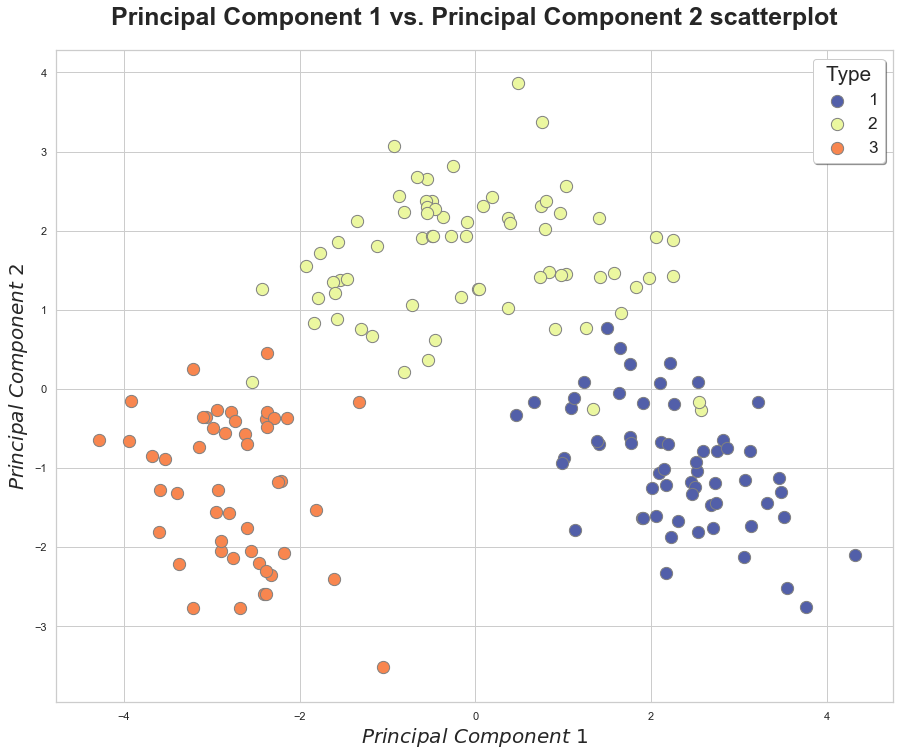

In [16]:
cl.scatterplot(processed_dataframe, 'Principal Component 1', 'Principal Component 2', color ='Type')

As we can see, extracting principal components, instead of randomly picking variables, allows us to perfectly recognize the clustering pattern defined by the pre-existing "Type" attribute.
Our aim, at this point, will be that of verifying if a K-means algorithm can succeed in reproducing the same result.

The next move will be setting up the values taken as input by our k_means clustering function and running the algorithm.

In [5]:
max_iterations, k = 100, 3
# The value of max_iterations is set to 500 by default, while that of k to 1.

Since the functions returns four different values, we store them into four new variables.

In [6]:
centroids, clusters_changes, iterations, data_and_distances = cl.k_means(processed_dataframe, max_iterations, k)

The K-means algorithm converged after 9 iterations.


Here we print the centroids resulting from the last iteration of the algorithm.

In [7]:
centroids.drop(columns = list(centroids.columns[13:19]))

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Centroids,,,,,,,,,,,,,
0.0,-0.926820,-0.371033,-0.450278,0.211241,-0.604859,-0.057025,0.036270,-0.004706,0.002319,-0.904000,0.446860,0.275848,-0.776474
1.0,0.780928,-0.329278,0.294308,-0.625796,0.655551,0.836537,0.932697,-0.573949,0.619046,0.139587,0.488313,0.758352,1.088740
2.0,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088


While here we are creating a dictionary with the data needed to draw an animated scatterplot. This choice was made in order to allow a better visualization of what happened during the execution of the algorithm.

In [8]:
plot_data = {'clusters_changes': clusters_changes, 'iterations': iterations, 'K': k, 'data': data_and_distances}

__N.B.__ The animated plot, on GitHub, will only be visible through NBViewer, so we kindly ask you to switch to this mode.

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


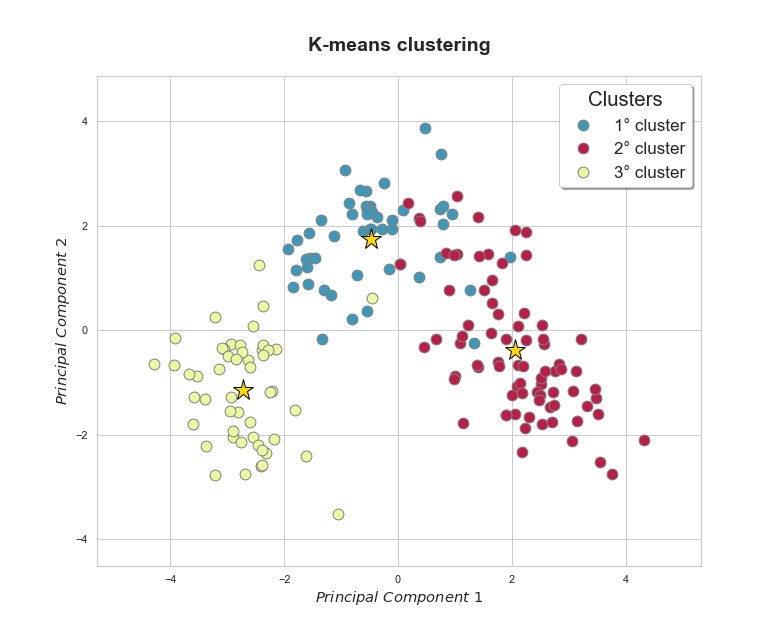

In [19]:
k_means_clustering_plot = cl.SubplotAnimation(plot_data)
plt.show()
HTML(k_means_clustering_plot.to_jshtml())

As a bonus, we resorted to three-dimensional plotting to better understand how the clusters are positioned in space. 

<IPython.core.display.Javascript object>


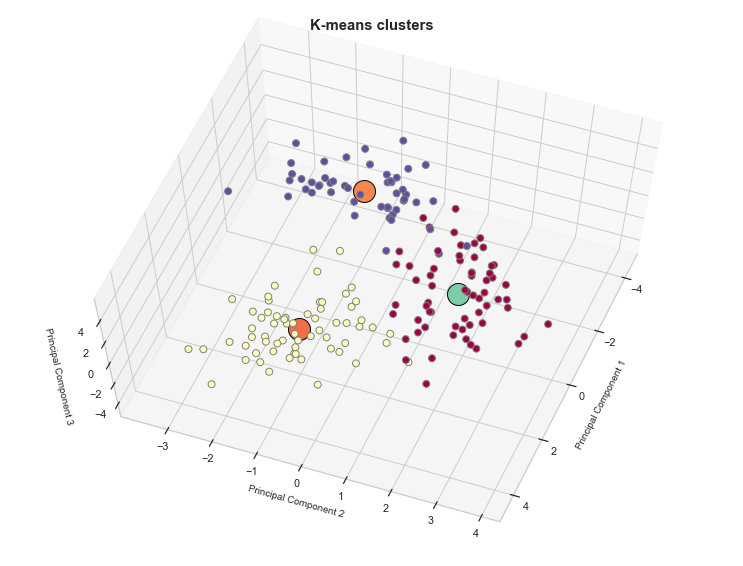

In [11]:
scatterplot_3D = cl.scatterplot_3D(data_and_distances, centroids)

### Bonus Clustering

We decided to implement K-Means via PySpark too, making use of the Map/Reduce paradigm. 

In [12]:
import numpy as np
from pyspark.sql import SparkSession

In here we generate a txt file of random integers that will constitute the data over which the algorithm will be run.

In [13]:
f = open("points.txt", "w+")
for i in range(50):
    random_numbers = ''.join(str(np.random.randint(100, size = 3)).strip('[').strip(']'))
    f.write(random_numbers.strip().replace('  ', ' ') + '\n')
f.close() 

This one, instead, is a custom function to evaluate the distance among points and centroids, that we will use in the Map/Reduce phase.

In [14]:
def closest_point(point, centroids):
    best_index = 0
    closest = float('+inf')
    for i in range(len(centroids)):
        temporary_distance = np.sum((point - centroids[i]) ** 2)
        if temporary_distance < closest:
            closest = temporary_distance
            best_index = i
    return best_index

In [15]:
spark = SparkSession.builder.appName("K-means").getOrCreate()

rows_from_txt = spark.read.text('points.txt').rdd.map(lambda row: row[0])
data = rows_from_txt.map(lambda row: np.array([float(x) for x in row.split(' ')]))
number_of_centroids = 3
tollerance = 0.001
k = data.takeSample(False, number_of_centroids, 1)
temporary_distance = 1.0

while temporary_distance > tollerance:
    closest_points = data.map(lambda point: (closest_point(point, k), (point, 1)))\
                         .reduceByKey(lambda point1_centroid1, point2_centroid2:\
                                     (point1_centroid1[0] + point2_centroid2[0], point1_centroid1[1] + point2_centroid2[1]))\
                         .map(lambda st: (st[0], st[1][0] / st[1][1])).collect()
    temporary_distance = sum(np.sum((k[index] - point) ** 2) for (index, point) in closest_points)
    for (index, point) in closest_points:
        k[index] = point

print("Last iteration Centroids: " + str(k))

spark.stop()

Last iteration Centroids: [array([25.69565217, 47.        , 23.82608696]), array([52.375, 52.   , 87.125]), array([80.36363636, 64.36363636, 34.54545455])]
